# Zadanie domowe 3
Agata Kaczmarek

W tym zadaniu mamy dany zbiór danych dotyczący pogody w Australii. Mamy wytrenować trzy dowolne klasyfikatory, które będą przewidywać czy  następnego dnia będzie padał deszcz. Na koniec należy wybrać który z tych klasyfikatorów będzie najlepszy (według wykorzystanych minimum trzech miar oceny klasyfikatorów).

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings('ignore')
np.random.seed = 42

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier

Najpierw odczytuję dane i zapoznaję się z nimi. 
Ponieważ zbiór został już przygotowany do pracy, pomijam takie kroki.

In [3]:
data = pd.read_csv('australia.csv')
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [8]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,0.220879,0.220259
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,0.414843,0.414425
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.000000,0.000000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

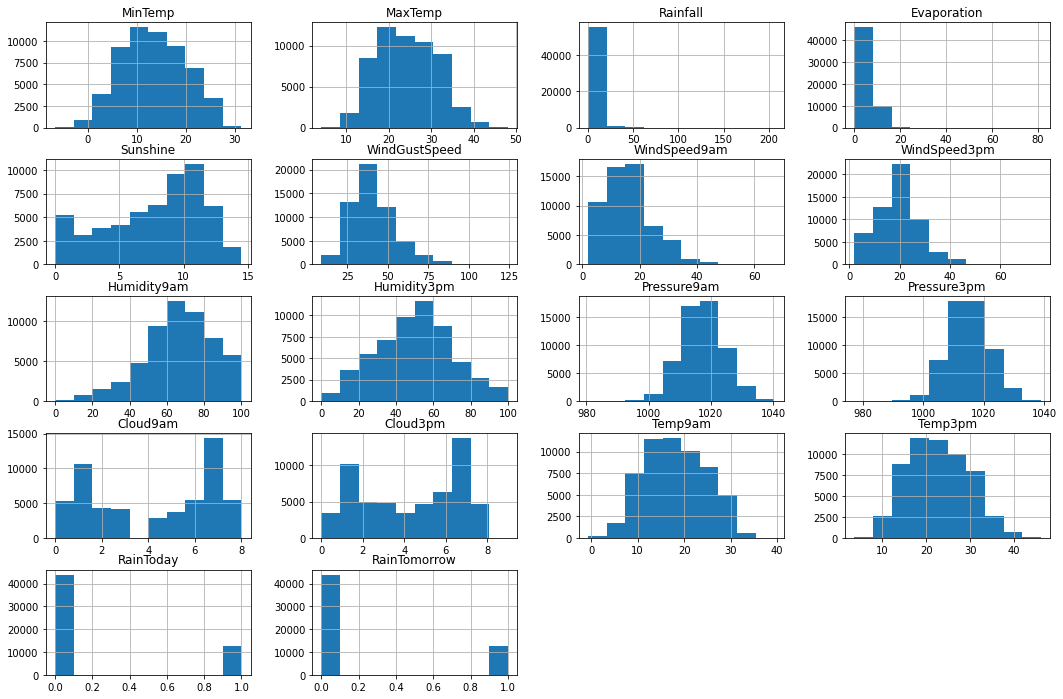

In [6]:
data.hist(bins=10, figsize=(18,12))
plt.show()

### Przygotowanie zbioru treningowego i testowego

Jak widzimy poniżej, kolumna *RainTomorrow* jest niezbalansowana, co będzie trzeba wziąć pod uwagę podczas późniejszych analiz modeli. Również z tego powodu dodajemy parametr *stratify* przy dzieleniu zbioru na treningowy i testowy.

In [28]:
data["RainTomorrow"].value_counts()

0    43993
1    12427
Name: RainTomorrow, dtype: int64

In [90]:
y_true=np.array(data["RainTomorrow"])
x_true=data.drop(["RainTomorrow"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x_true,y_true,test_size=0.3,random_state=42, stratify=y_true)

In [91]:
print(X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0])

39494 16926 39494 16926


### Klasyfikatory i miary ich oceny

#### Regresja logistyczna

*max_iter* to maksymalna liczba iteracji

In [92]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_hat_lr=lr.predict(X_test)
print('y: '+str(y_test[0:20])+ '\ny_hat: ' +str(y_hat_lr[0:20]))

y: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]


Miary oceny

In [110]:
print('Accuracy: '+ str(accuracy_score(y_test, y_hat_lr)))
print('Precision: '+ str(precision_score(y_test, y_hat_lr)))
print('ROC AUC: '+ str(roc_auc_score(y_test, y_hat_lr)))
print('F1 score: '+ str(f1_score(y_test, y_hat_lr)))
print('Recall: '+ str(recall_score(y_test, y_hat_lr)))

Accuracy: 0.8525345622119815
Precision: 0.7268041237113402
ROC AUC: 0.7366428991387042
F1 score: 0.6126629422718807
Recall: 0.5295064377682404


#### Drzewo decyzyjne

*max_depth* to maksymalna głębokość

In [94]:
tree=DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train)
y_hat_tree=tree.predict(X_test)
print('y: '+str(y_test[0:20])+ '\ny_hat: ' +str(y_hat_tree[0:20]))

y: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0]


Miary oceny


In [109]:
print('Accuracy: '+ str(accuracy_score(y_test, y_hat_tree)))
print('Precision: '+ str(precision_score(y_test, y_hat_tree)))
print('ROC AUC: '+ str(roc_auc_score(y_test, y_hat_tree)))
print('F1 score: '+ str(f1_score(y_test, y_hat_tree)))
print('Recall: '+ str(recall_score(y_test, y_hat_tree)))


Accuracy: 0.7988892827602505
Precision: 0.5424528301886793
ROC AUC: 0.7114823695487742
F1 score: 0.5487804878048781
Recall: 0.5552575107296137


#### Random Forest

*n_estimators* - liczba drzew w lesie

*max_depth* - maksymalna głębokość drzewa

*max_features* - maksymalna liczba zmiennych brana pod uwagę podczas podziału 



In [104]:
model_rf = y_hat_nb(n_estimators=1000, 
                                  max_depth=10, 
                                  max_features = 4, 
                                  random_state=0,
                                  n_jobs = -1)
model_rf.fit(X_train, y_train)
y_hat_rf=model_rf.predict(X_test)
print('y: '+str(y_test[0:20])+ '\ny_hat: ' +str(y_hat_rf[0:20]))

y: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
y_hat: [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]


Miary oceny

In [108]:
print('Accuracy: '+ str(accuracy_score(y_test, y_hat_rf)))
print('Precision: '+ str(precision_score(y_test, y_hat_rf)))
print('ROC AUC: '+ str(roc_auc_score(y_test, y_hat_rf)))
print('F1 score: '+ str(f1_score(y_test, y_hat_rf)))
print('Recall: '+ str(recall_score(y_test, y_hat_rf)))

Accuracy: 0.8556067588325653
Precision: 0.7646331409727948
ROC AUC: 0.7271608529904713
F1 score: 0.6028599285017874
Recall: 0.49758583690987124


### Podsumowanie

Powyżej przedstawione zostało kilka miar dla każdego z tych modeli. Jednak tak naprawdę część z nich jest mało użyteczna, jeśli mamy do czynienia z niezbalansowanymi danymi jak to ma miejsce w tym przypadku. Jedną z takich miar jest accuracy - wystarczy by model przewidział, że nigdy nie będzie padać jutro (same 0) i już otrzymuje accuracy na poziomie prawie 80% (43993/56420).

Jeśli chodzi o miarę ROC AUC, to jest ona generalnie użyteczna nawet przy niezbalansowanych danych, jednak może dawać trochę mylne wyniki, gdy klasa mniejszościowa jest mała (jak u nas). Dużo lepszą miarą dla naszych niezbalansowanych danych jest F1 score. Tak więc patrząc na wyniki powyższych modeli, najlepszy rezultat uzyskała regresja liniowa.
